# House Price Predictor using Functional API - ANN 

In [1]:
#importing all modules 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras

In [3]:
#importing housing california dataset 
from sklearn.datasets import fetch_california_housing
#creating object for dataset
housing = fetch_california_housing() 

In [4]:
# the data set has MedInc - median income in block, HouseAge - median house age in block, AvgRoom - average number of rooms, 
#AvgBedroom - average number of bedroom, Population - block population, AvgOccup - average house occupancy
#Lattitute - house lattitude , Longitude - House longitude
#the target variable is median house value in unit of 100,000 for california district

In [5]:
#data set is in the form of dictionary
#checking key for value in data set
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
from sklearn.model_selection import train_test_split
#spliiting the data set in test and train data set
#by default it will split in 75 : 25 ratio
X_train_full , X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state = 42)
#splitting train data set into train and validation data set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [7]:
#data pre processing
#standardizing our data 
from sklearn.preprocessing import StandardScaler
#creating object of standard scalar
scaler = StandardScaler()
#training scaler object with training data
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
#checking our training data
X_train.shape

(11610, 8)

Creating Model using Functional API

In [14]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
#giving input as function
hidden1 = keras.layers.Dense(30, activation="relu") (input_)
hidden2 = keras.layers.Dense(30, activation="relu") (hidden1)
concat = keras.layers.concatenate([input_ , hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs =[input_], outputs = [output])

In [15]:
#checking model Summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_10[0][0]             

In [16]:
#compiling our model
model.compile(loss = "mean_squared_error",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3),
              metrics = ["mae"])

In [21]:
#training our model
model_history = model.fit(X_train, y_train, epochs= 40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3765 - mae: 0.4404 - val_loss: 0.4289 - val_mae: 0.4736
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3748 - mae: 0.4396 - val_loss: 0.4332 - val_mae: 0.4813
Epoch 3/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3746 - mae: 0.4395 - val_loss: 0.4281 - val_mae: 0.4730
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.3726 - mae: 0.4379 - val_loss: 0.4275 - val_mae: 0.4762
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3717 - mae: 0.4375 - val_loss: 0.4266 - val_mae: 0.4727
Epoch 6/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3701 - mae: 0.4368 - val_loss: 0.4265 - val_mae: 0.4709
Epoch 7/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3696 - mae: 0.4356 - val_loss: 0.4259 - val_mae: 0.4727
Epoch 8/40
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [22]:
#checking performance of our model on test data
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3758 - mae: 0.4433


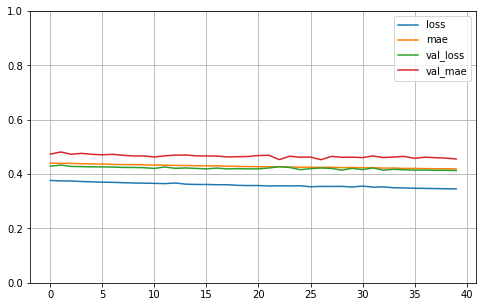

In [23]:
#visualizing performance by plotting graph
pd.DataFrame(model_history.history).plot(figsize =(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
 #creating new test data
 X_new = X_test[:3]

In [27]:
print(model.predict(X_new)) #printiung predicted value
print(y_test[:3]) #printing original value

[[0.7570546]
 [1.6610036]
 [4.7113967]]
[0.477   0.458   5.00001]


In [28]:
#saving my model
model.save("FunctionalAPI .h5")

# END